### Problem statement

Familiarise yourself with the code base for the algorithms presented in the textbook; the code is available at https://github.com/aimacode/aima-python. In particular, download and experiment with the search algorithms, available at http://aima.cs.berkeley.edu/python/search.html. Consider the following tasks:

(a) Create a map for the Northeast of Scotland, with the main towns and their distances, and use the algorithms to find a route between any two towns.

(b) Model the problem of the jugs introduced above, and use the algorithms to find a solution. (todo)


### Importing modules and classes from aima

In [1]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

### Problem class

In [3]:
psource(Problem)

### Node class

In [4]:
psource(Node)

### The graph problem class

In [5]:
psource(GraphProblem)

## Problem definition

#### The map of Scotland (kind of)

In [6]:
scotland_map = UndirectedGraph(dict(
    Edinburgh=dict(Glasgow=75, Melrose=140, Dundee=118, Perth=45),
    Glasgow=dict(Ayr=85, Edinburgh=101, Perth=28),
    Ayr=dict(Glasgow=85, Melrose=146),
    Melrose=dict(Ayr=146, Edinburgh=67),
    Dundee=dict(Aberdeen=126, Perth=89),
    Aberdeen=dict(Dundee=126, Inverness=155),
    Inverness=dict(Perth=184),
    Kirkwall=dict(Inverness=199),
    Perth=dict(Dundee=79, Glasgow=142, Inverness=201)))

scotland_map.locations = dict(
    Edinburgh=(400, 327), Glasgow=(253, 288),
    Ayr=(203, 259), Melrose=(462, 223), Dundee=(509, 444), 
    Aberdeen=(539, 549), Inverness=(339, 579), Kirkwall=(465, 739),
    Perth=(359, 414))

In [17]:
scotland_problem = GraphProblem('Ayr', 'Kirkwall', scotland_map)

In [18]:
scotland_locations = scotland_map.locations
print(scotland_locations)

{'Edinburgh': (400, 327), 'Glasgow': (253, 288), 'Ayr': (203, 259), 'Melrose': (462, 223), 'Dundee': (509, 444), 'Aberdeen': (539, 549), 'Inverness': (339, 579), 'Kirkwall': (465, 739), 'Perth': (359, 414)}


In [19]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in scotland_map.locations.keys()}
node_positions = scotland_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in scotland_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in scotland_map.graph_dict.items() for k2, v2 in v.items()}

scotland_graph_data = {  'graph_dict' : scotland_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

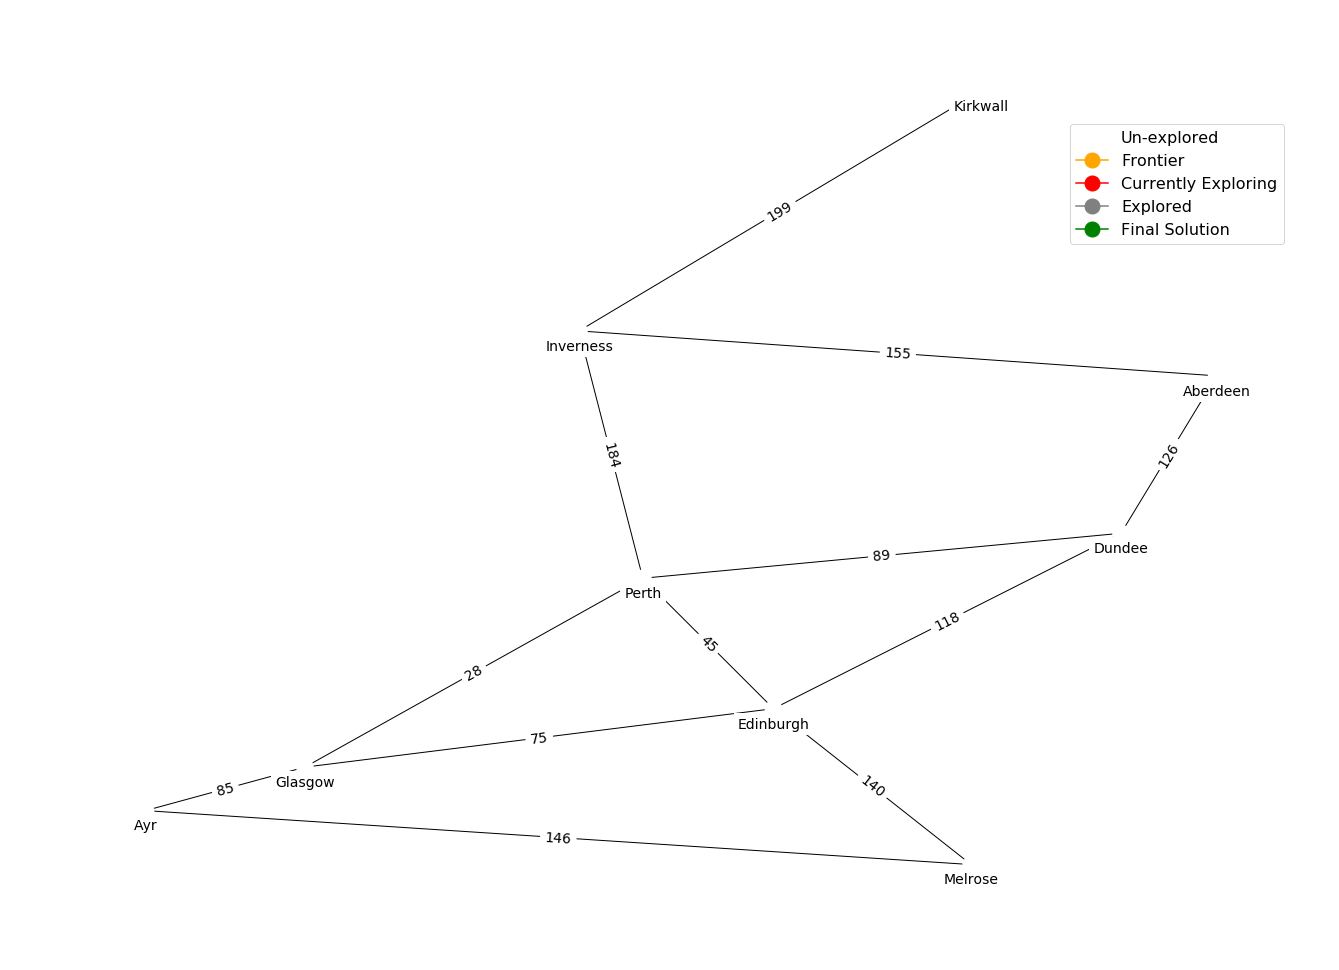

In [20]:
show_map(scotland_graph_data)

### Bread-first tree search

In [11]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [12]:
all_node_colors = []
scotland_problem = GraphProblem('Ayr', 'Kirkwall', scotland_map)
a, b, c = breadth_first_tree_search(scotland_problem)
display_visual(scotland_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=scotland_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

### Iterative deepening search

In [39]:
def depth_limited_search_graph(problem, limit = -1):
    '''
    Perform depth first search of graph g.
    if limit >= 0, that is the maximum depth of the search.
    '''
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of queue
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)

        elif limit >= 0:
            cutoff_occurred = True
            limit += 1
            all_node_color.pop()
            iterations -= 1
            node_colors[node.state] = "gray"

        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            limit -= 1
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return 'cutoff' if cutoff_occurred else None


def depth_limited_search_for_vis(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return(iterations, all_node_colors, node)

In [40]:
def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node=depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

In [41]:
all_node_colors = []
scotland_problem = GraphProblem('Ayr', 'Kirkwall', scotland_map)
display_visual(scotland_graph_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=scotland_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

#### IDS converges much quicker but fails to find the optimal solution.